# Lab 6 - Differentiation and Projectile Motion
#### Daisy L Whitfield
---

##### 6.2 Preparation
---

In [2]:
import numpy as np
import matplotlib.pyplot as plt

##### My guess is that it will return "123" then "213" since k is globally defined.

In [6]:
i=1
j=2
k=3
def f(i,j):
    print(i,j,k)
f(i,j)
f(j,i)

1 2 3
2 1 3


In [7]:
def show(f):
    print(f(2))
    print(f(3))
def f(i):
    return i**2
def g(i):
    return i**3
show(f)
show(g)

4
9
8
27


In [8]:
def show(f):
    print(f(2))
    print(f(3))
def f(i):
    return i**2
def g(i,j):
    return i**3
show(f)
show(g)

4
9


TypeError: g() missing 1 required positional argument: 'j'

---

##### Exercise 6.1 - Numerical Differentiation

In [9]:
def right(f,x,h):
    s = (f(x+h)-(f(x)))/h
    return s;
def f(x): # derivative 0
    return 2
def g(x): # derivative 3
    return 3*x
def h(x): # derivative 4x
    return 2*x** 2
def n(x):
    return 4*x**3
print(right(f,1,0.01))
print(right(g,1,0.01))
print(right(h,1,0.01)) 

0.0
3.000000000000025
4.020000000000001


In [10]:
print(right(n,3,0.001))

108.03600399998459


---

##### Exercise 6.2 - Center Derivation

In [11]:
def center(f,x,h):
    s = (f(x+h)-(f(x-h)))/(2*h)
    return s;

---

##### Exercise 6.3 - Compare right and Center Derivation

In [12]:
def f(x): # derivative 6x**2
    return 2*x** 3
print("right:", right(f,1,0.1), "center:", center(f,1,0.1)) 
print("right:", right(f,1,0.01),  "center:", center(f,1,0.01)) 
print("right:", right(f,1,0.001), "center:", center(f,1,0.001)) 

right: 6.620000000000008 center: 6.020000000000003
right: 6.060200000000027 center: 6.000200000000011
right: 6.006001999999455 center: 6.000001999999727


##### These results are consistent with the expectation that the truncation error goes as h for the right derivative and as h^2 for the center derivative.

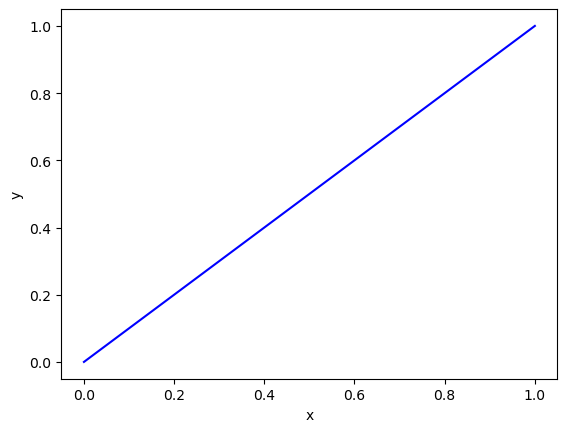

In [13]:
def f(x):
    return 0.5*x** 2
x = np.linspace(0,1,100)
y = center(f, x, 0.1)
plt.plot(x,y ,"-b")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

---

##### Exercise 6.4 - plot of cubed value

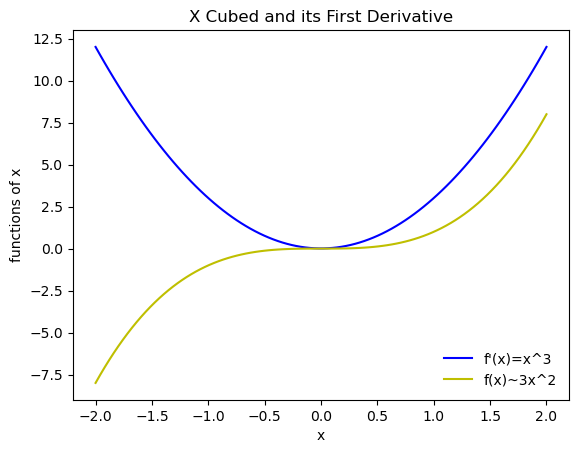

In [14]:
def f(x):
    return x ** 3


x = np.linspace(-2,2,100)
y = center(f, x, 0.1)
yy = f(x)
plt.plot(x,y ,"-b", label="f'(x)=x^3")
plt.plot(x,yy,"-y", label="f(x)~3x^2")
plt.legend(frameon = False)
plt.title("X Cubed and its First Derivative")
plt.xlabel("x")
plt.ylabel("functions of x")
plt.show()

---

##### Exercise 6.5 - sin and its derivatives

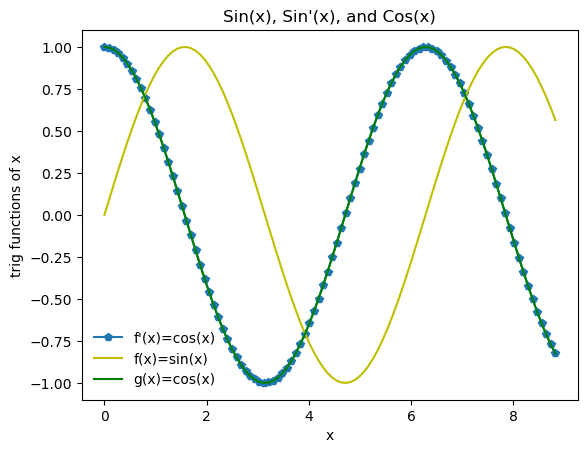

In [15]:
def f(x):
    return np.sin(x)


x = np.linspace(0,2 ** np.pi,100)
y = center(f, x, 0.1)
yy = f(x)
yyy = np.cos(x)
plt.plot(x,y ,"-p", label="f'(x)=cos(x)")
plt.plot(x,yy,"-y", label="f(x)=sin(x)")
plt.plot(x,yyy,"-g", label="g(x)=cos(x)")
plt.legend(frameon = False)
plt.title("Sin(x), Sin'(x), and Cos(x)")
plt.xlabel("x")
plt.ylabel("trig functions of x")
plt.show()

---

##### Exercise 6.6 - Euler Function

In [3]:
def euler(dt , x, y, vx , vy , ax , ay):
    x = x + vx * dt
    y = y + vy * dt
    vx = vx + ax * dt
    vy = vy + ay * dt
    return x, y, vx , vy

In [4]:
print(np.around(euler(0.134 , 0.659 , 0.282 , 0.662 , 0.643 , 0.900 , 0.451),2))
print(np.around(euler(0.924 , 0.959 , 0.575 , 0.299 , 0.710 , 0.699 , 0.471),2))

[0.75 0.37 0.78 0.7 ]
[1.24 1.23 0.94 1.15]


---
##### Exercise 6.7 - Projectile Motion

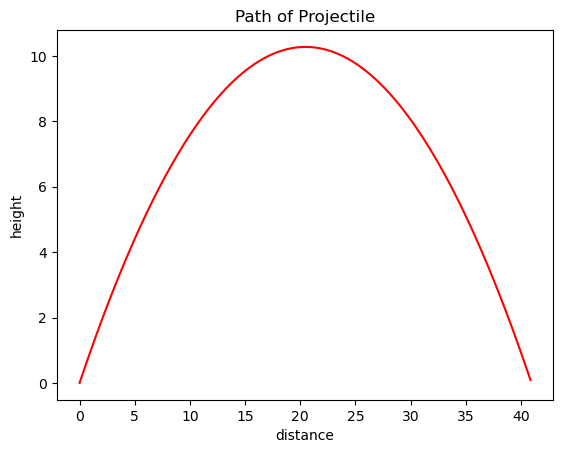

In [72]:
def euler(dt , x, y, vx , vy , ax , ay):
    x = x + vx * dt
    y = y + vy * dt
    vx = vx
    vy = vy + ay * dt
    return x, y, vx , vy





def tj():
    tjx = np.array([])
    tjy = np.array([])
    tau = 2*np.pi
    vi = 20 # [m/s]
    g = -9.8 # [m/s^2]
    theta = tau/8
    dt = 0.01 # [s]
    x = 0 # [m]
    y = 0 # [m]
    vx = vi*np.cos(theta)
    vy = vi*np.sin(theta)
    while y >= 0:
        tjx = np.append(tjx, x)
        tjy = np.append(tjy, y)
        x, y, vx, vy = euler(dt, x, y, vx, vy, vi, g)
    return tjx, tjy;


tjx, tjy = tj()
plt.plot(tjx,tjy,"-r", label=" ")
plt.title("Path of Projectile")
plt.xlabel("distance")
plt.ylabel("height")
plt.show()

---
##### Exercise 6.8 - Paper Derivation for Max Range

---
##### Exercise 6.9 - Plotting KE, PE, and TE

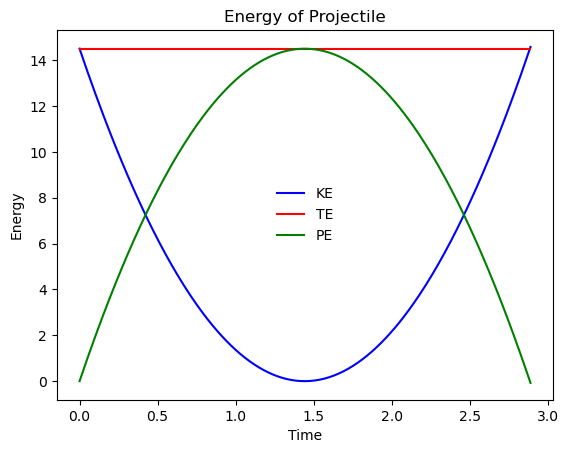

In [19]:
def euler(dt , x, y, vx , vy , ax , ay):
    x = x + vx * dt
    y = y + vy * dt
    vx = vx
    vy = vy + ay * dt
    return x, y, vx , vy





def tj():
    tjx = np.array([])
    tjy = np.array([])
    tjvx = np.array([])
    tjvy = np.array([])
    tjte = np.array([])
    tau = 2*np.pi
    vi = 20 # [m/s]
    g = -9.8 # [m/s^2]
    theta = tau/8
    dt = 0.01 # [s]
    x = 0 # [m]
    y = 0 # [m]
    vx = vi*np.cos(theta)
    vy = vi*np.sin(theta)
    m = 0.145
    te = 0
    pe = 0
    while y >= 0:
        ke = (1 / 2) * m * (vy) ** 2
        if y == 0:
            te = ke
        else:
            pe = te-ke
        tjx = np.append(tjx, x)
        tjy = np.append(tjy, y)
        tjvx = np.append(tjvx, ke)
        tjvy = np.append(tjvy, pe)
        tjte = np.append(tjte, te)
        x, y, vx, vy = euler(dt, x, y, vx, vy, vi, g)
    return tjx, tjy, tjvx, tjvy, tjte;

t = np.arange(tjx.size)*0.01
tjx, tjy, tjvx, tjvy, tjte = tj()
plt.plot (t, tjvx, "b-", label = "KE")
plt.plot(t, tjte,"r-", label="TE")
plt.plot(t,tjvy,"g-", label="PE")
plt.legend(frameon = False)
plt.title("Energy of Projectile")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()

---
##### Exercise 6.10 - Drag Effect on Projectile Motion

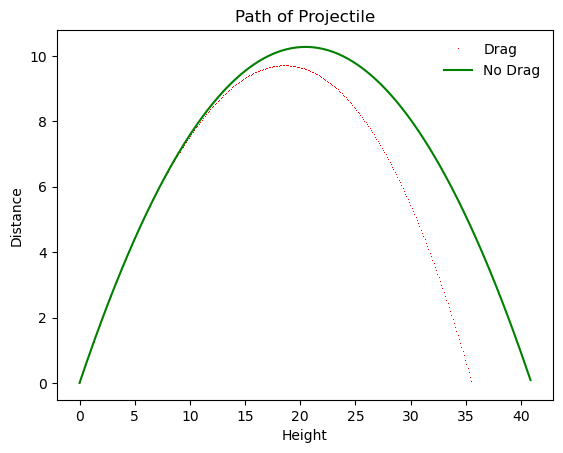

In [102]:
def euler(dt , x, y, vx , vy , ax , ay):
    x = x + vx * dt
    y = y + vy * dt
    vx = vx
    vy = vy + ay * dt
    return x, y, vx, vy





def tj():
    tjx = np.array([])
    tjy = np.array([])
    tjx1 = np.array([])
    tjy1 = np.array([])
    tau = 2*np.pi
    vi = 20 # [m/s]
    g = -9.8 # [m/s^2]
    theta = tau/8
    dt = 0.01 # [s]
    x = 0 # [m]
    y = 0 # [m]
    vx = vi*np.cos(theta)
    xx = vx
    vy = vi*np.sin(theta)
    yy = vy
    drco = 0.00622
    while y >= 0:   
        tjx1 = np.append(tjx1, x)
        tjy1 = np.append(tjy1, y)
        x, y, vx, vy = euler(dt, x, y, vx, vy, vi, g)
        vx = vx - (vx * drco * (vx ** 2) ** 0.5) * dt
        vy = vy - (vy * drco * (vy ** 2) ** 0.5) * dt
    x = 0 # [m]
    y = 0 # [m]
    vx = vi*np.cos(theta)
    vy = vi*np.sin(theta)
    while y >= 0:   
        tjx = np.append(tjx, x)
        tjy = np.append(tjy, y)
        x, y, vx, vy = euler(dt, x, y, vx, vy, vi, g)
    return tjx, tjy, tjx1, tjy1

x, y, tjx1, tjy1 = tj()
plt.plot(tjx1, tjy1, "r,", label = "Drag")
plt.plot(x, y, "g-", label = "No Drag")
plt.legend(frameon = False)
plt.title("Path of Projectile")
plt.xlabel("Height")
plt.ylabel("Distance")
plt.show()

---
##### Exercise 6.11 - Effect of Drag on Energy of a Projectile

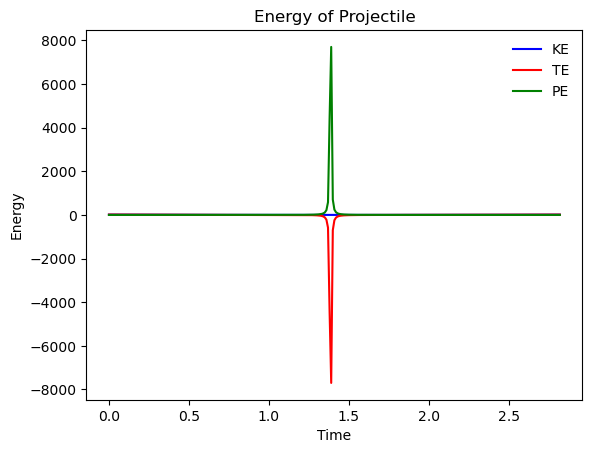

In [142]:
def euler(dt , x, y, vx , vy , ax , ay):
    x = x + vx * dt
    y = y + vy * dt
    vx = vx
    vy = vy + ay * dt
    return x, y, vx , vy





def tj():
    tjvx = np.array([])
    tjvy = np.array([])
    tjte = np.array([])
    tau = 2*np.pi
    vi = 20 # [m/s]
    g = -9.8 # [m/s^2]
    theta = tau/8
    dt = 0.01 # [s]
    x = 0 # [m]
    y = 0 # [m]
    vx = vi*np.cos(theta)
    vy = vi*np.sin(theta)
    m = 0.145
    te = 0
    pe = 0
    drco = 0.00622
    while y >= 0:
        ke = (1 / 2) * m * (vy) ** 2
        pe = 1/ke
        if y == 0:
            te = ke
        else:
            te = ke - pe
        vx = vx - (vx * drco * (vx ** 2) ** 0.5) * dt
        vy = vy - (vy * drco * (vy ** 2) ** 0.5) * dt
        x, y, vx, vy = euler(dt, x, y, vx, vy, vi, g)
        tjvx = np.append(tjvx, ke)
        tjvy = np.append(tjvy, pe)
        tjte = np.append(tjte, te)
    tjvx = np.append(tjvx, 13)
    tjvy = np.append(tjvy, 0)
    tjte = np.append(tjte, 13)
    tjvx = np.append(tjvx, 13)
    tjvy = np.append(tjvy, 0)
    tjte = np.append(tjte, 13)

    return tjvx, tjvy, tjte;

t = np.arange(tjx.size)*0.01
tjvx, tjvy, tjte = tj()
plt.plot (t, tjvx, "b-", label = "KE")
plt.plot(t, tjte,"r-", label="TE")
plt.plot(t,tjvy,"g-", label="PE")
plt.legend(frameon = False)
plt.title("Energy of Projectile")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.show()